Total    float64
East     float64
West     float64
dtype: object
                     Total  East  West
Date                                  
2012-10-03 00:00:00   13.0   4.0   9.0
2012-10-03 01:00:00   10.0   4.0   6.0
2012-10-03 02:00:00    2.0   1.0   1.0
2012-10-03 03:00:00    5.0   2.0   3.0
2012-10-03 04:00:00    7.0   6.0   1.0
...                    ...   ...   ...
2020-11-30 19:00:00   35.0  17.0  18.0
2020-11-30 20:00:00   22.0  12.0  10.0
2020-11-30 21:00:00   11.0   6.0   5.0
2020-11-30 22:00:00   11.0   5.0   6.0
2020-11-30 23:00:00    5.0   0.0   5.0

[137798 rows x 3 columns]
          Total       East       West
Date                                 
0     2579224.0  1144576.0  1434648.0
1     2743070.0  1222639.0  1520431.0
2     2731737.0  1218282.0  1513455.0
3     2597000.0  1165667.0  1431333.0
4     2346877.0  1052262.0  1294615.0
5     1268168.0   634995.0   633173.0
6     1232565.0   624993.0   607572.0


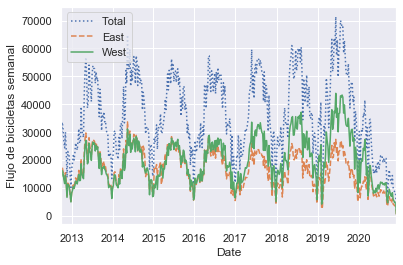

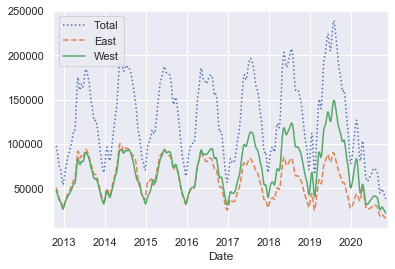

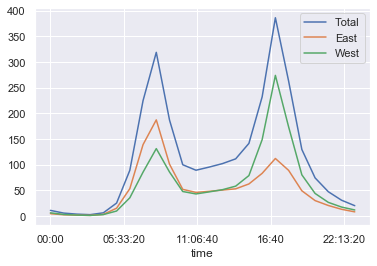

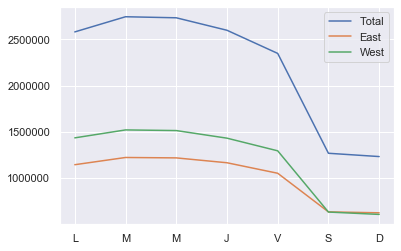

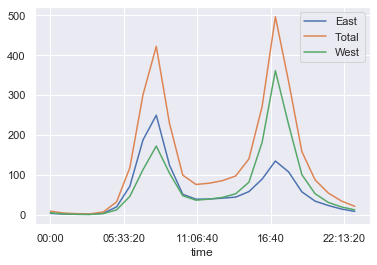

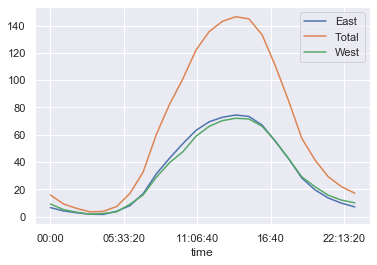

In [7]:
import numpy as np;import pandas as pd;import seaborn as sns; from matplotlib import pyplot as ppt; sns.set()

seattle=pd.read_csv('C:\\Users\\SONY\\Desktop\\NumPy\\Fremont_Bridge_Bicycle_Counter.csv',index_col='Date',parse_dates=True)
seattle.columns=['Total','East','West']
print(seattle.dtypes)
print(seattle)
seattle.index.time?
semanal=seattle.resample('W').sum()
semanal.plot(style=[':','--','-'])
ppt.ylabel('Flujo de bicicletas semanal')

daily=seattle.resample('D').sum()
daily.rolling(50,center=True,win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

por_hora=seattle.groupby(seattle.index.time).mean().plot()

por_dia_semana=seattle.groupby(seattle.index.dayofweek).sum()
print(por_dia_semana)
por_dia_semana.index=['L','M','M','J','V','S','D']
por_dia_semana.plot()

weekend = np.where(seattle.index.weekday < 5, 'Weekday', 'Weekend')
by_time =seattle.pivot_table(index=[weekend, seattle.index.time])
by_time_semana=by_time.loc['Weekday'].plot()
by_time_finde=by_time.loc['Weekend'].plot()
